In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, classification_report, accuracy_score

In [58]:
df = pd.read_csv('income_evaluation.csv')
df.head(2)

,Unnamed: 0,age,workclass,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,1.0,0.0,40.0,United-States,0.0
1,1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,13.0,United-States,0.0


In [27]:
df.isna().sum()

Unnamed: 0         0
age               31
workclass         28
education         33
education_num     30
marital_status    43
occupation        27
relationship      37
capital_gain      18
capital_loss      26
hours_per_week    35
native_country    30
income            32
dtype: int64

In [59]:
df = df.iloc[:,1:]
numbers = df.select_dtypes('number')
numbers.drop('income', axis = 1, inplace =  True)

X_train, X_test, y_train, y_test = train_test_split(numbers,df.income, random_state=2020)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

/Users/joel/anaconda3/envs/py3-6/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
first_model = LogisticRegression(random_state=2020, solver='liblinear')

In [64]:
cross_val_score(first_model, X_train, y_train, cv=5)

array([0.79861693, 0.80804694, 0.79836512, 0.80528191, 0.80985325])

In [65]:
first_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [305]:
def score_string(true, preds):
    return f'''\nAccuracy:   {np.round(accuracy_score(true, preds), decimals=2)}\nPrecision:   {np.round(precision_score(true, preds), decimals=2)}\nRecall:        {np.round(recall_score(true, preds), decimals=2)}\nF1:             {np.round(f1_score(true, preds), decimals=2)}'''

def evaluation(model):
    fig,ax = plt.subplots(1,2, figsize=(12,12))
    train_hat = model.predict(X_train)
    test_hat = model.predict(X_test)

    plot_confusion_matrix(model, X_train, y_train, cmap='Greens', ax=ax[0], normalize='true')

    ax[0].text(0.3, 1.5,
               score_string(y_train, train_hat), 
               ha='left', va='top', 
               transform=ax[0].transAxes, fontsize=15);

    plot_confusion_matrix(model, X_test, y_test, cmap='Greens', ax=ax[1], normalize='true')

    ax[1].text(0.3, 1.5,
               score_string(y_test, test_hat), 
               ha='left', va='top', 
               transform=ax[1].transAxes, fontsize=15);
    ax[0].text(0.3, 1.6,
              'Train',
              transform=ax[0].transAxes, fontsize=25);
    ax[1].text(0.3, 1.6,
              'Test',
              transform=ax[1].transAxes, fontsize=25);


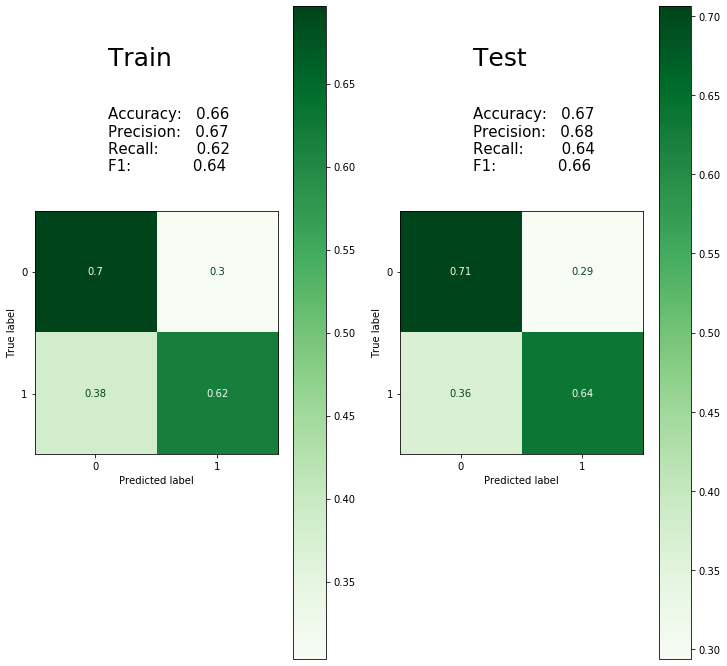

In [306]:
evaluation(first_model)

In [308]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

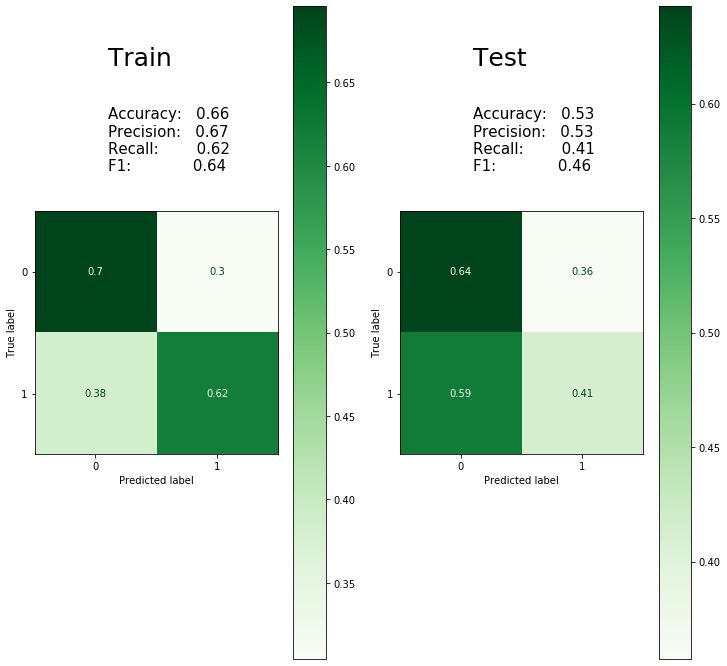

In [311]:
first_model_scaled = LogisticRegression(random_state=2020)
first_model_scaled.fit(X_train, y_train)
evaluation(first_model_scaled)

In [29]:
def check():
    return np.random.choice([False, True], p=[.999, .001])

for row in df.index:
    for idx in range(len(df.columns)):
        if check():
            df.iloc[row, idx] = np.nan